In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
myfile = files.upload()

Saving health_data.csv to health_data.csv


In [4]:
import io

In [23]:
data = pd.read_csv(io.BytesIO(myfile['health_data.csv']))
data.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [28]:
#안 볼 column drop하기
health = data.drop([data.columns[0],data.columns[1],data.columns[30]],axis=1)
health

,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,36,M,9,165,60,72.1,1.2,1.5,1,1,...,1.0,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN
1,27,F,13,150,65,81.0,0.8,0.8,1,1,...,1.0,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN
2,11,F,12,155,55,70.0,0.6,0.7,1,1,...,1.0,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN
3,31,M,13,160,70,90.8,1.0,1.0,1,2,...,1.0,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0
4,41,F,12,155,50,75.2,1.5,1.2,1,1,...,1.0,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,44,F,13,155,55,83.0,1.2,1.2,1,1,...,1.0,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN
9996,43,F,11,160,55,77.5,1.0,1.2,1,1,...,1.0,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0
9997,45,M,12,160,80,93.0,0.6,0.6,1,1,...,1.0,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN
9998,27,F,15,155,55,78.0,0.6,1.0,1,1,...,NaN,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN


In [21]:
obesity = health.loc[:,['체중(5Kg 단위)','허리둘레','시력(좌)','시력(우)']]
obesity

,체중(5Kg 단위),허리둘레,시력(좌),시력(우)
0,60,72.1,1.2,1.5
1,65,81.0,0.8,0.8
2,55,70.0,0.6,0.7
3,70,90.8,1.0,1.0
4,50,75.2,1.5,1.2
...,...,...,...,...
9995,55,83.0,1.2,1.2
9996,55,77.5,1.0,1.2
9997,80,93.0,0.6,0.6
9998,55,78.0,0.6,1.0


In [22]:
obesity.corr()

,체중(5Kg 단위),허리둘레,시력(좌),시력(우)
체중(5Kg 단위),1.000000,0.784348,0.080452,0.082611
허리둘레,0.784348,1.000000,0.009188,0.010575
시력(좌),0.080452,0.009188,1.000000,0.200569
시력(우),0.082611,0.010575,0.200569,1.000000


In [ ]:
#비만율에 관련 있다고 알려진 요소들 중 체중, 허리둘레, 시력(좌,우)를 선발하여 obesity라는 별도의 데이터프레임 생성
#이 중에서는 허리둘레와 시력(좌,우) 간의 상관관계가 가장 약하다. 특히 허리둘레와 우측 시력
#가장 상관관계가 높은 것은 허리둘레와 체중이라고 할 수 있다. 

In [27]:
people = health.loc[:,['시도코드','성별코드','연령대코드(5세단위)']]
people.head()

,시도코드,성별코드,연령대코드(5세단위)
0,36,M,9
1,27,F,13
2,11,F,12
3,31,M,13
4,41,F,12


In [ ]:
#health 데이터셋에서 간에 영향을 미치는 요소들과 연령대 출력, 이들로 데이터프레임 생성
#이를 통해 실제로 나이를 먹을수록 간 기능이 약화되는지 확인해보고자 함

In [54]:
liver = health.loc[:,['연령대코드(5세단위)','(혈청지오티)AST','(혈청지오티)ALT','감마지티피']]
liver

,연령대코드(5세단위),(혈청지오티)AST,(혈청지오티)ALT,감마지티피
0,9,21.0,27.0,21.0
1,13,18.0,15.0,15.0
2,12,27.0,25.0,7.0
3,13,65.0,97.0,72.0
4,12,18.0,17.0,14.0
...,...,...,...,...
9995,13,20.0,21.0,20.0
9996,11,24.0,22.0,21.0
9997,12,22.0,27.0,35.0
9998,15,26.0,24.0,21.0


In [55]:
liver = liver.assign(평균 = lambda x: (x['(혈청지오티)AST']+x['(혈청지오티)ALT']+x['감마지티피'])/3)
liver

,연령대코드(5세단위),(혈청지오티)AST,(혈청지오티)ALT,감마지티피,평균
0,9,21.0,27.0,21.0,23.000000
1,13,18.0,15.0,15.0,16.000000
2,12,27.0,25.0,7.0,19.666667
3,13,65.0,97.0,72.0,78.000000
4,12,18.0,17.0,14.0,16.333333
...,...,...,...,...,...
9995,13,20.0,21.0,20.0,20.333333
9996,11,24.0,22.0,21.0,22.333333
9997,12,22.0,27.0,35.0,28.000000
9998,15,26.0,24.0,21.0,23.666667


In [56]:
#글꼴깨짐을 방지하기 위해 이름을 rename한다.
liver = liver.rename(columns={'연령대코드(5세단위)':'Age','(혈청지오티)AST':'AST','(혈청지오티)ALT':'ALT','감마지티피':'GTP','평균':'Avg'})
liver

,Age,AST,ALT,GTP,Avg
0,9,21.0,27.0,21.0,23.000000
1,13,18.0,15.0,15.0,16.000000
2,12,27.0,25.0,7.0,19.666667
3,13,65.0,97.0,72.0,78.000000
4,12,18.0,17.0,14.0,16.333333
...,...,...,...,...,...
9995,13,20.0,21.0,20.0,20.333333
9996,11,24.0,22.0,21.0,22.333333
9997,12,22.0,27.0,35.0,28.000000
9998,15,26.0,24.0,21.0,23.666667


In [50]:
#liver 데이터셋에서 간평균과 연령대코드 간 상관관계를 분석하고 이를 히트맵으로 그려보았다. 
liver.corr()

,Age,AST,ALT,GTP,Avg
Age,1.000000,0.050859,-0.067403,-0.051584,-0.043704
AST,0.050859,1.000000,0.799851,0.492947,0.776029
ALT,-0.067403,0.799851,1.000000,0.420528,0.740010
GTP,-0.051584,0.492947,0.420528,1.000000,0.911353
Avg,-0.043704,0.776029,0.740010,0.911353,1.000000


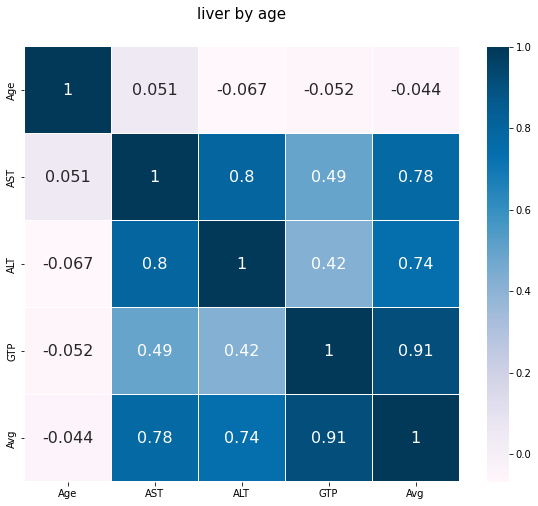

In [51]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("liver by age", y = 1.05, size = 15)
sns.heatmap(liver.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [ ]:
#Age와 Avg 간에는 음의 상관관계가 있다. 강하지는 않지만, -0.044라는 것을 감안했을 때 실제로 나이가 들수록 간세포 등 세포에 손상이 감을 알 수 있다.
#Age와 GRP,ALT가 음의 상관관계임을 보았을 때 노화할수록 손상되는 세포는 간세포가 아닌 세포의 비중이 더 큼을 알 수 있다.

In [ ]:
#음주가 간에 영향을 끼친다고 했을 때, 그 영향에 성별에 따른 차이가 있는지 알아보고자 하였다. 

In [59]:
beersoju = health.loc[:,['성별코드','(혈청지오티)AST','(혈청지오티)ALT','감마지티피']]

,성별코드,(혈청지오티)ALT,감마지티피
0,M,27.0,21.0
1,F,15.0,15.0
2,F,25.0,7.0
3,M,97.0,72.0
4,F,17.0,14.0


In [67]:
a = len(beersoju.loc[beersoju['성별코드'] == 'M'])
a

5138

In [68]:
b = len(beersoju.loc[beersoju['성별코드'] == 'F'])
b

4862

In [85]:
sex = pd.DataFrame([['Male',5138],['Female',4862]],columns=['sex','number'])
sex

,sex,number
0,Male,5138
1,Female,4862


In [ ]:
#sex를 bar graph 형태로 시각화하였다.

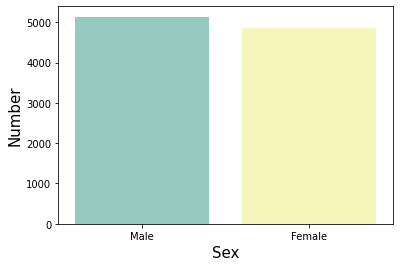

In [86]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('Set3')
sns.barplot(data=sex, x='sex', y='number')
plt.xlabel("Sex", size=15)
plt.ylabel("Number", size=15)
plt.show()
#전체 피검자 중에는 남성이 살짝 더 많았지만, 차이가 매우 근소했음을 알 수 있다. 즉, 성별에 따른 간 손상 차이는 거의 없는 것이다.

In [ ]:
#지역별 인구 분포를 파악하고자 health 데이터에서 column을 선별해 새로운 데이터셋을 만들었다.
#이 데이터셋으로, pie chart를 시각화하였다.


In [88]:
sido = health.loc[:,['시도코드','성별코드']]

In [98]:
sido = sido.loc[sido['성별코드'] == 'F'] #성별이 여자인 경우만 우선 추림

In [99]:
sido = sido.sort_values(by='시도코드',ascending=False)
sido.head()

,시도코드,성별코드
3294,49,F
8047,49,F
2235,49,F
3201,49,F
5752,49,F


In [100]:
print(len(sido.loc[sido['시도코드'] == 49]))
print("-----------------------------")
print(len(sido.loc[sido['시도코드'] == 48]))
print("-----------------------------") 
print(len(sido.loc[sido['시도코드'] == 47]))
print("-----------------------------") 
print(len(sido.loc[sido['시도코드'] == 46]))
print("-----------------------------") 
print(len(sido.loc[sido['시도코드'] == 45]))
print("-----------------------------") 
print(len(sido.loc[sido['시도코드'] == 44]))
print("-----------------------------") 
print(len(sido.loc[sido['시도코드'] == 43]))
print("-----------------------------")
print(len(sido.loc[sido['시도코드'] == 42]))
print("-----------------------------") 
print(len(sido.loc[sido['시도코드'] == 41]))
print("-----------------------------") 
print(len(sido.loc[sido['시도코드'] == 36]))
print("-----------------------------") 
print(len(sido.loc[sido['시도코드'] == 31]))
print("-----------------------------") 
print(len(sido.loc[sido['시도코드'] == 30]))
print("-----------------------------") 
print(len(sido.loc[sido['시도코드'] == 29]))
print("-----------------------------") 
print(len(sido.loc[sido['시도코드'] == 28]))
print("-----------------------------") 
print(len(sido.loc[sido['시도코드'] == 27]))
print("-----------------------------") 
print(len(sido.loc[sido['시도코드'] == 26]))
print("-----------------------------") 
print(len(sido.loc[sido['시도코드'] == 11]))
print("-----------------------------") 
 


56
-----------------------------
317
-----------------------------
259
-----------------------------
168
-----------------------------
209
-----------------------------
200
-----------------------------
163
-----------------------------
169
-----------------------------
1199
-----------------------------
41
-----------------------------
102
-----------------------------
156
-----------------------------
133
-----------------------------
280
-----------------------------
236
-----------------------------
332
-----------------------------
842
-----------------------------


In [104]:
female = pd.DataFrame([['Jeju',56],['kyungnam',317],['kyungbook',259],['jeonnam',168],['jeonbook',209],['choongnam',200],['choongbook',163],
                       ['kangwon',169],['kyunggi',1199],['sejong',41],['ulsan',102],['daejeon',156],['kwangju',133],['incheon',280],['daegu',236],['busan',332],
                       ['seoul',842]],columns=['region','number'])
female

,region,number
0,Jeju,56
1,kyungnam,317
2,kyungbook,259
3,jeonnam,168
4,jeonbook,209
5,choongnam,200
6,choongbook,163
7,kangwon,169
8,kyunggi,1199
9,sejong,41


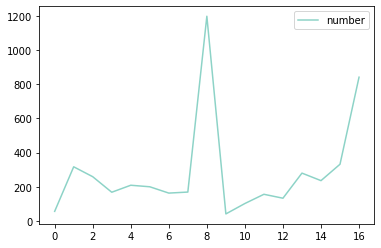

In [112]:
#위 데이터에서 number만으로 그래프를 그려보았다. plot을 활용하였으며, 8번 kyunggi에 사람이 가장 몰렸음을 알 수 있다.
%matplotlib inline
female.plot()


In [ ]:
ealth = data.drop([data.columns[0],data.columns[1],data.columns[30]],axis=1)
health

In [139]:
female2 = female.drop(0)

In [140]:
female2 = female2.drop(9)


In [141]:
femalenew = female2.drop(8)



,region,number
1,kyungnam,317
2,kyungbook,259
3,jeonnam,168
4,jeonbook,209
5,choongnam,200
6,choongbook,163
7,kangwon,169
10,ulsan,102
11,daejeon,156
12,kwangju,133


In [142]:
newfemale = femalenew.drop(7)

In [147]:
newfemale2 = newfemale.drop(10)
newfemale2  #하위 4개 지역이었던 제주,세종,울산, 광주 행을 지워 pie chart의 가독성을 높였다.

,region,number
1,kyungnam,317
2,kyungbook,259
3,jeonnam,168
4,jeonbook,209
5,choongnam,200
6,choongbook,163
11,daejeon,156
12,kwangju,133
13,incheon,280
14,daegu,236


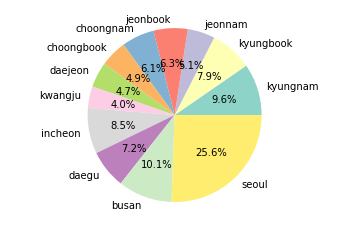

In [148]:
import matplotlib.pyplot as plt
import pandas as pd
data = newfemale2
plt.axis('equal')
plt.pie(data['number'],labels = data['region'],autopct ='%1.1f%%' )
plt.show()


In [ ]:
#결과를 해석하면, 여성 피검자들은 경기도가 아닌 서울에 가장 많이 거주함을 알 수 있다. 그 다음으로 많이 거주하는 곳이 부산이나, 부산과 서울 간 여성 거주민은 2배 이상 차이가 난다. 